## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  80.720545  1256.399710  0.206124   2.852194  1.145902
1  67.323885   375.690356  0.352209   6.485822  1.049652
2  80.028407   751.543641  0.912339   8.536183  1.354099
3  27.491708   189.687755  0.949762  10.350888  1.353438
4  76.428716  1469.703809  0.490304   5.268304  1.615102


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0567502	total: 58.1ms	remaining: 58.1s
1:	learn: 1.0496563	total: 58.7ms	remaining: 29.3s
2:	learn: 1.0413584	total: 59.5ms	remaining: 19.8s
3:	learn: 1.0328310	total: 60ms	remaining: 14.9s
4:	learn: 1.0256143	total: 60.3ms	remaining: 12s
5:	learn: 1.0185519	total: 60.8ms	remaining: 10.1s
6:	learn: 1.0104751	total: 61.4ms	remaining: 8.7s
7:	learn: 1.0013214	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9937418	total: 62.2ms	remaining: 6.85s
9:	learn: 0.9841748	total: 62.7ms	remaining: 6.21s
10:	learn: 0.9761835	total: 63.2ms	remaining: 5.68s
11:	learn: 0.9681744	total: 63.6ms	remaining: 5.24s
12:	learn: 0.9605877	total: 64.2ms	remaining: 4.87s
13:	learn: 0.9521117	total: 65.3ms	remaining: 4.6s
14:	learn: 0.9445961	total: 65.7ms	remaining: 4.31s
15:	learn: 0.9369280	total: 66.1ms	remaining: 4.06s
16:	learn: 0.9294522	total: 66.4ms	remaining: 3.84s
17:	learn: 0.9231673	total: 66.9ms	remaining: 3.65s
18:	learn: 0.9162122	total: 67.4ms	remaining: 3.48

107:	learn: 0.5028372	total: 106ms	remaining: 878ms
108:	learn: 0.4998747	total: 107ms	remaining: 872ms
109:	learn: 0.4970219	total: 107ms	remaining: 867ms
110:	learn: 0.4940985	total: 108ms	remaining: 861ms
111:	learn: 0.4915641	total: 108ms	remaining: 854ms
112:	learn: 0.4886218	total: 108ms	remaining: 848ms
113:	learn: 0.4868410	total: 108ms	remaining: 842ms
114:	learn: 0.4845359	total: 109ms	remaining: 837ms
115:	learn: 0.4811009	total: 109ms	remaining: 831ms
116:	learn: 0.4782844	total: 109ms	remaining: 826ms
117:	learn: 0.4768017	total: 110ms	remaining: 821ms
118:	learn: 0.4743610	total: 110ms	remaining: 817ms
119:	learn: 0.4716107	total: 111ms	remaining: 812ms
120:	learn: 0.4684928	total: 111ms	remaining: 808ms
121:	learn: 0.4661182	total: 112ms	remaining: 805ms
122:	learn: 0.4635049	total: 112ms	remaining: 801ms
123:	learn: 0.4608549	total: 113ms	remaining: 798ms
124:	learn: 0.4578340	total: 113ms	remaining: 793ms
125:	learn: 0.4559398	total: 114ms	remaining: 789ms
126:	learn: 

293:	learn: 0.2275961	total: 186ms	remaining: 446ms
294:	learn: 0.2270095	total: 186ms	remaining: 445ms
295:	learn: 0.2259403	total: 187ms	remaining: 444ms
296:	learn: 0.2254018	total: 187ms	remaining: 443ms
297:	learn: 0.2244365	total: 187ms	remaining: 441ms
298:	learn: 0.2227625	total: 188ms	remaining: 440ms
299:	learn: 0.2221918	total: 188ms	remaining: 439ms
300:	learn: 0.2205513	total: 189ms	remaining: 438ms
301:	learn: 0.2200422	total: 189ms	remaining: 437ms
302:	learn: 0.2184570	total: 189ms	remaining: 436ms
303:	learn: 0.2179465	total: 190ms	remaining: 435ms
304:	learn: 0.2163776	total: 190ms	remaining: 434ms
305:	learn: 0.2156239	total: 191ms	remaining: 433ms
306:	learn: 0.2150470	total: 191ms	remaining: 432ms
307:	learn: 0.2145093	total: 192ms	remaining: 431ms
308:	learn: 0.2140279	total: 192ms	remaining: 430ms
309:	learn: 0.2135793	total: 193ms	remaining: 429ms
310:	learn: 0.2129796	total: 193ms	remaining: 429ms
311:	learn: 0.2122032	total: 194ms	remaining: 427ms
312:	learn: 

521:	learn: 0.1074067	total: 288ms	remaining: 263ms
522:	learn: 0.1070645	total: 288ms	remaining: 263ms
523:	learn: 0.1067324	total: 289ms	remaining: 262ms
524:	learn: 0.1064523	total: 289ms	remaining: 262ms
525:	learn: 0.1061296	total: 289ms	remaining: 261ms
526:	learn: 0.1058556	total: 290ms	remaining: 260ms
527:	learn: 0.1055420	total: 290ms	remaining: 259ms
528:	learn: 0.1052541	total: 291ms	remaining: 259ms
529:	learn: 0.1049858	total: 291ms	remaining: 258ms
530:	learn: 0.1046585	total: 291ms	remaining: 257ms
531:	learn: 0.1043975	total: 292ms	remaining: 257ms
532:	learn: 0.1040951	total: 292ms	remaining: 256ms
533:	learn: 0.1037792	total: 292ms	remaining: 255ms
534:	learn: 0.1034823	total: 293ms	remaining: 255ms
535:	learn: 0.1033567	total: 293ms	remaining: 254ms
536:	learn: 0.1031021	total: 294ms	remaining: 253ms
537:	learn: 0.1028291	total: 294ms	remaining: 252ms
538:	learn: 0.1027071	total: 295ms	remaining: 252ms
539:	learn: 0.1024431	total: 295ms	remaining: 251ms
540:	learn: 

703:	learn: 0.0702935	total: 368ms	remaining: 155ms
704:	learn: 0.0701562	total: 368ms	remaining: 154ms
705:	learn: 0.0698491	total: 369ms	remaining: 154ms
706:	learn: 0.0698266	total: 369ms	remaining: 153ms
707:	learn: 0.0695270	total: 369ms	remaining: 152ms
708:	learn: 0.0693498	total: 370ms	remaining: 152ms
709:	learn: 0.0693276	total: 370ms	remaining: 151ms
710:	learn: 0.0690358	total: 370ms	remaining: 151ms
711:	learn: 0.0689133	total: 371ms	remaining: 150ms
712:	learn: 0.0688887	total: 371ms	remaining: 149ms
713:	learn: 0.0688644	total: 372ms	remaining: 149ms
714:	learn: 0.0687441	total: 372ms	remaining: 148ms
715:	learn: 0.0687201	total: 373ms	remaining: 148ms
716:	learn: 0.0686964	total: 373ms	remaining: 147ms
717:	learn: 0.0685656	total: 373ms	remaining: 147ms
718:	learn: 0.0682806	total: 374ms	remaining: 146ms
719:	learn: 0.0680023	total: 374ms	remaining: 146ms
720:	learn: 0.0678289	total: 375ms	remaining: 145ms
721:	learn: 0.0678055	total: 375ms	remaining: 144ms
722:	learn: 

933:	learn: 0.0422914	total: 470ms	remaining: 33.2ms
934:	learn: 0.0422144	total: 470ms	remaining: 32.7ms
935:	learn: 0.0420955	total: 471ms	remaining: 32.2ms
936:	learn: 0.0419147	total: 471ms	remaining: 31.7ms
937:	learn: 0.0418042	total: 471ms	remaining: 31.2ms
938:	learn: 0.0416881	total: 472ms	remaining: 30.7ms
939:	learn: 0.0415955	total: 472ms	remaining: 30.1ms
940:	learn: 0.0414688	total: 473ms	remaining: 29.6ms
941:	learn: 0.0413869	total: 473ms	remaining: 29.1ms
942:	learn: 0.0413442	total: 474ms	remaining: 28.6ms
943:	learn: 0.0412641	total: 474ms	remaining: 28.1ms
944:	learn: 0.0412059	total: 475ms	remaining: 27.6ms
945:	learn: 0.0411273	total: 475ms	remaining: 27.1ms
946:	learn: 0.0410213	total: 475ms	remaining: 26.6ms
947:	learn: 0.0409462	total: 476ms	remaining: 26.1ms
948:	learn: 0.0409348	total: 476ms	remaining: 25.6ms
949:	learn: 0.0408611	total: 477ms	remaining: 25.1ms
950:	learn: 0.0408499	total: 477ms	remaining: 24.6ms
951:	learn: 0.0408388	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

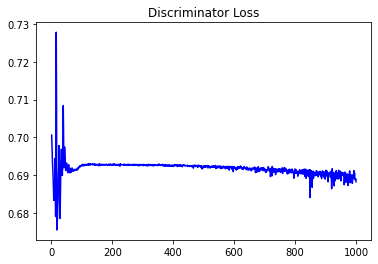

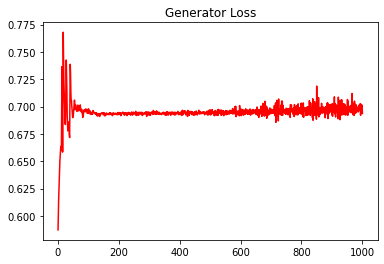

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.150925627528343


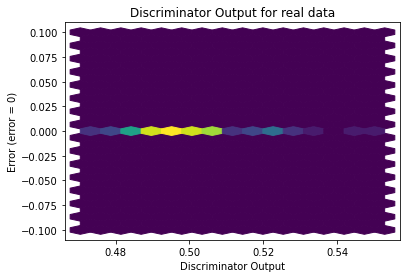

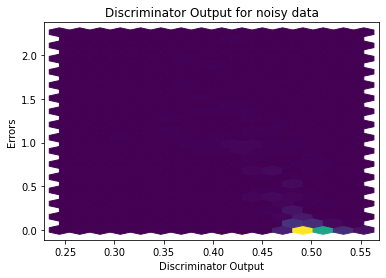

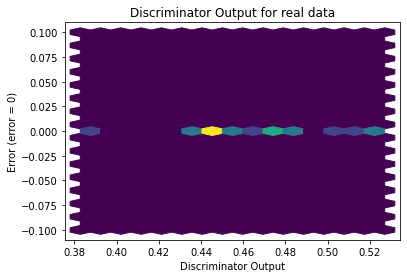

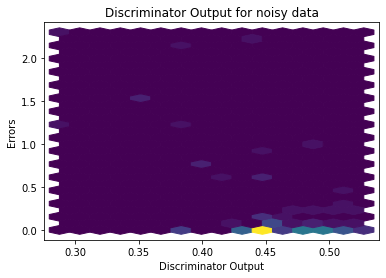

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


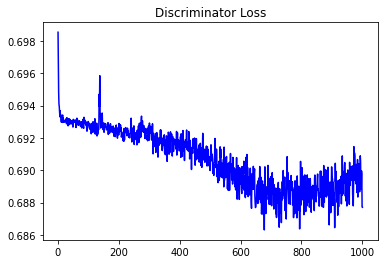

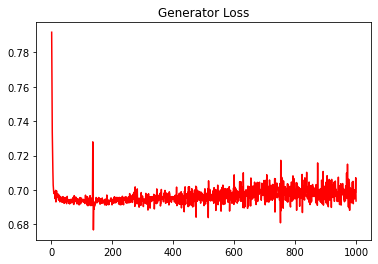

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1459735065917364


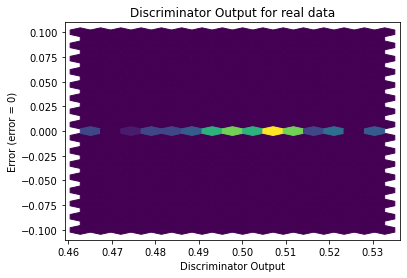

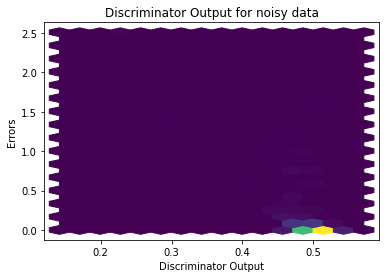

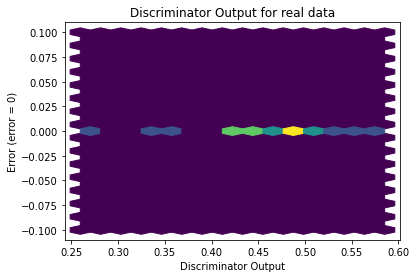

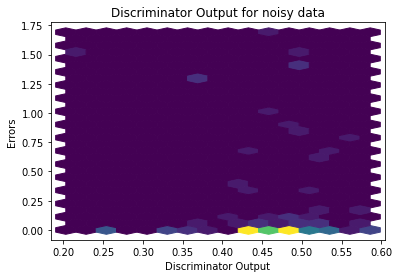

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1599]], requires_grad=True)
